<span style="font-size: 14pt">MIPT, Advanced ML, Spring 2018</span>

<span style="font-size: 16pt"> HW #7: CNN models

<span style="color:blue; font-size: 12pt">Sergey Kolesnikov</span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'"> scitator@gmail.com</span>


<h1 align="center">Organization Info</h1> 

* Дедлайн **27 апреля 2018 23:59** для всех групп.
* В качестве решения задания нужно прислать ноутбук с подробными комментариями (<span style='color:red'> без присланного решения результат контеста не будет засчитан </span>).
* <span style='color:red'>Название команды в контесте должно соответствовать шаблону: НомерГруппы_Имя_Фамилия, например, 594_Ivan_Ivanov</span>.

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall_<номер_группы>_<фамилия>``, к примеру -- ``ML2018_fall_495_ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb, к примеру`` -- ``ivanov_401_task7.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall Question <Содержание вопроса>``


--------
- **PS1:** Используются автоматические фильтры, и просто не найдем ваше дз, если вы неаккуратно его подпишите.
- **PS2:**  Просроченный дедлайн снижает максимальный вес задания по формуле, указнной на первом семинаре
- **PS3:** Допустимы исправление кода предложенного кода ниже, если вы считаете

---

<h1 align="center">Check Questions </h1> 

Ниже приводится список вопросов, с ответами на которые может быть полезно разобраться для понимания темы.

**Вопрос 1**: Чем отличаются современные сверточные сети от сетей 5 летней давности?

**Ответ:** Как минимум, глубиной и вообще размером, которые сильно увеличились

**Вопрос 2**: Какие неприятности могут возникнуть во время обучения современных нейросетей?

**Ответ:** Всевозможные варианты численных проблем, как минимум проблема - протащщить градиенты через глубокую сеть. Т.е. глубокая сеть может совсем не обучаться или очень быстро переобучаться из-за своего огромного размера и большого числа настраиваемых параметров.


**Вопрос 3**: У вас есть очень маленький датасет из 100 картинок, классификация, но вы очень хотите использовать нейросеть, какие неприятности вас ждут и как их решить? что делать если первый вариант  решения не заработает?

**Ответ:** Почти наверное сеть переобучится, ибо очень маленький датасет. Первый вариант решения - найти большой датасет. Второй - если определяются предметы на изображениях, то их (изображения) можно посемплировать: из 100 изображений можно сделать больше, если отражать их, обрезать и прочее.  **этот вопрос дал мне + 2% accuracy к лучшему решению и +10% к конкректно этому**

**Вопрос 4**: Можно ли сделать стайл трансфер для музыки и как?

**Ответ:** Как-то попытаться можно. Можно распознавать ноты, распознавать для каждого стиля тональности и темп. После на распознанные по музыке ноты наложить требуемую тональнось и темп, например, с помощью формата MIDI, где отдельно хранятся ноты и инструменты, которые их воспроизводят. Получится, скорее всего, не идеально, но по началу, как я думаю, будет трудно угадать оригинальный жанр. В конце-концов, на эту тему есть различные статьи, но о призме для музыки я ещё не слышал.

---

<h1 align="center">Theory Questions</h1> 

---

### Useful notebooks
#### Colab link (seminar): https://colab.research.google.com/drive/18xjvLspViCwTUXTBNiz_xKxlUblQuGPU
#### Colab link (hw): https://colab.research.google.com/drive/1FlYpA-JHCZ1UilPScC2zWhZNCkE3Sv78

---

# CIFAR Quest

(please read it at least diagonally)

* The ultimate quest is to create a network that has as high __accuracy__ as you can push it.
* There is a __mini-report__ at the end that you will have to fill in. We recommend reading it first and filling it while you iterate.
 
## Grading
* starting at zero points
* +2 for describing your iteration path in a report below.
* +2 for correct check questions
* +1 for beating each of these milestones on __TEST__ dataset:
    * 60% (5 total)
    * 65% (6 total)
    * 70% (7 total)
    * 75% (8 total)
    * 80% (9 total)
    * 82% (10 total)
* +2 for really cool solution:
    * 84% (12 total)
    * 86% (14 total)
    * 88% (16 total)
    * 90% (18 total)
    * 92% (20 total)
    
## Bonus points

Common ways to get bonus points are:
* Get higher score, obviously.
* Anything special about your NN. For example "A super-small/fast NN that gets 80%" gets a bonus.
* Any detailed analysis of the results. (saliency maps, whatever)

## Restrictions
* Please do __NOT__ use pre-trained networks for this assignment.
 * In other words, milestones must be beaten without pre-trained nets (and such net must be present in the e-mail).
* you __can__ use validation data for training, but you __can't'__ do anything with test data apart from running the evaluation procedure.

---

In [1]:
# Load data. It may work slow.
!mkdir cifar10
!curl -o cifar-10-python.tar.gz https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -xvzf cifar-10-python.tar.gz -C cifar10

mkdir: cannot create directory ‘cifar10’: File exists
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  162M  100  162M    0     0  9794k      0  0:00:17  0:00:17 --:--:-- 7615k
cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [0]:
import _pickle as pickle
import os
import time
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn
from IPython import display
%matplotlib inline

In [3]:
tf.__version__

'1.7.0'

In [4]:
tf.test.is_gpu_available()

True

In [0]:
def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = pickle.load(f, encoding='iso-8859-1')
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).astype("float")
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)    
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte

In [0]:
plt.rcParams['figure.figsize'] = (10.0, 8.0) 

cifar10_dir = './cifar10/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

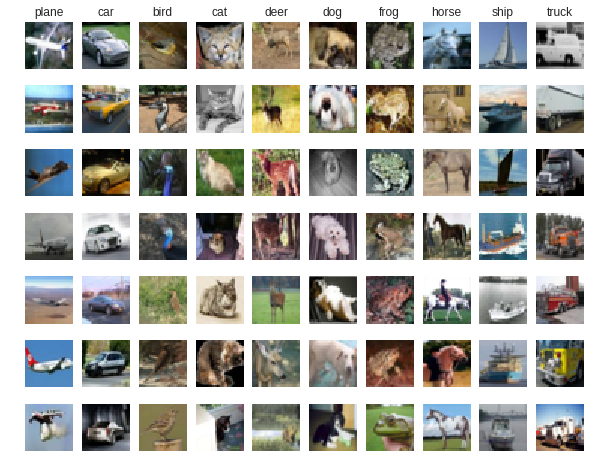

In [7]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8').transpose(1, 2, 0))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [8]:
X_train.shape, y_train[0]  #, pool1.shape

((50000, 3, 32, 32), 6)

In [0]:
f = np.stack(
    [np.stack([np.arange(25).reshape((5, 5)) * (i+1) + j for i in range(3)]) for j in range(2)])
def flip_color(f):
    F = np.empty(shape=(f.shape[0], f.shape[2], f.shape[3], f.shape[1]))
    for i in range(3):
        F[:, :, :, i] = f[:, i, :, :]
    return  F

In [10]:
i, c = 1, 1
f[i, c, :, :] == flip_color(f)[i, :, :, c]

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [0]:
def one_hot(y):
    y_hot = np.zeros(shape=(len(y), 10))
    for i in range(10):
        y_hot[y == i, i] = 1
    return y_hot

In [0]:
y_train, y_test = one_hot(y_train), one_hot(y_test)

#X_train, X_test = flip_color(X_train), flip_color(X_test)
X_train = (X_train.transpose(0, 2, 3, 1).astype(float) - 128) / 128.
X_test = (X_test.transpose(0, 2, 3, 1).astype(float) - 128) / 128.

In [13]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 10))

In [0]:
mode = tf.estimator.ModeKeys.TRAIN

input_layer = tf.placeholder('float32', shape=(None, 32, 32, 3))

In [0]:
training = tf.placeholder('bool')

In [0]:

conv11 = tf.layers.conv2d(
    inputs=input_layer,
    filters=32,
    kernel_size=[3, 3],
    padding='SAME',
    activation=tf.nn.relu
)
conv12 = tf.layers.conv2d(
    inputs=conv11,
    filters=64,
    kernel_size=[3, 3],
    padding='SAME',
    activation=tf.nn.relu
)
pool1 = tf.layers.max_pooling2d(conv12, pool_size=[2, 2], strides=2, padding='SAME')
drop1 = tf.layers.dropout(pool1, rate=0.25, name="drop1", training=training)

conv21 = tf.layers.conv2d(
    inputs=drop1,
    filters=128,
    kernel_size=[3, 3],
    padding='SAME',
    activation=tf.nn.relu
)
pool21 = tf.layers.max_pooling2d(conv21, pool_size=[2, 2], strides=2, padding='SAME')
conv22 = tf.layers.conv2d(
    inputs=pool21,
    filters=128,
    kernel_size=[2, 2],
    padding='SAME',
    activation=tf.nn.relu
)
pool22 = tf.layers.max_pooling2d(conv22, pool_size=[2, 2], strides=2, padding='SAME')
drop2 = tf.layers.dropout(pool22, rate=0.25, name="drop2", training=training)


flat3 = tf.reshape(drop2, [-1, 4 * 4 * 128])

fc3 = tf.layers.dense(inputs=flat3, units=1500, activation=tf.nn.relu)
drop3 = tf.layers.dropout(fc3, rate=0.25, training=training)

with tf.variable_scope("softmax", reuse=tf.AUTO_REUSE):
  softmax = tf.layers.dense(inputs=drop3, units=10, activation=tf.nn.softmax, name="softmax")

In [0]:
output = tf.placeholder(tf.float32, shape=[None, 10])
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=softmax, labels=output)) + tf.losses.get_regularization_loss()
y_pred_cls = tf.argmax(softmax, axis=1)

correct_prediction = tf.equal(y_pred_cls, tf.argmax(output, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [0]:
global_step = tf.Variable(initial_value=0, trainable=False, name='global_step')
learning_rate = tf.placeholder(tf.float32, shape=[], name='learning_rate')

In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss, global_step=global_step)

In [0]:
def lr(epoch):
    return 5e-4 * ((0.5) ** (epoch // 10))

In [0]:
# Write your convolutional NN with Tensorflow (example in seminar).
# For example 3 convolutions and poolings and dense layer after that.
#lr = lambda : 0.01

def train_fn(X, y, sess):
    '''
    returns tuple (loss, accuracy) for model train phase
    '''
    sess.run(optimizer, feed_dict={input_layer:X, output:y, learning_rate: lr(epoch), training: True})
    loss_value, accuracy_value = sess.run([loss, accuracy],
                                             feed_dict={input_layer:X, output:y, learning_rate: lr(epoch), training: True})
    return loss_value, accuracy_value

def eval_fn(X, y, sess):
    '''
    returns tuple (loss, accuracy) for model evaluation phase
    '''
    loss_value, accuracy_value = sess.run([loss, accuracy],
                                          feed_dict={input_layer:X, output:y, learning_rate: lr(epoch), training: False})
    return loss_value, accuracy_value

def predict_fn(X, sess):
    '''
    returns y_pred for model predict phase
    '''
    
    y_pred_cls_value = sess.run([y_pred_cls], feed_dict={input_layer:X, learning_rate: lr(epoch), training: False})
    return y_pred_cls_value


In [0]:
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.arange(len(inputs))
        np.random.shuffle(indices)
    for start_idx in range(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]

In [0]:
# @TODO: add your code for train&validation metrics plots:
#  - epoch loss (train&validation - 2 curves on same figure)
#  - epoch accurary (train&validation - 2 curves on same figure)

In [0]:
X_val, y_val = X_test, y_test

In [25]:
X_train_s = np.concatenate([X_train, X_train[:, :, ::-1, :]])  # МЕГА - ФИЧА (см описание, + 10% accuracy)
y_train_s = np.concatenate([y_train, y_train])
X_train_s.shape, y_train_s.shape

((100000, 32, 32, 3), (100000, 10))

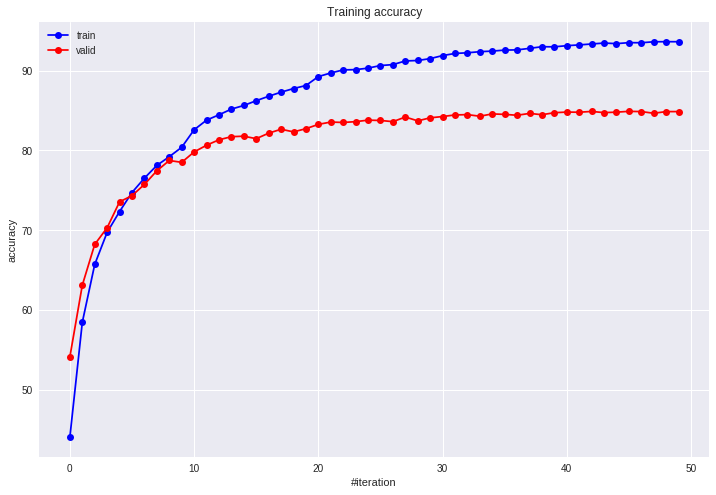

Epoch 50 of 50 took 40.084s
  train loss:		1.526638
  train accuracy:		93.63 %
  valid loss:		1.613574
  valid accuracy:		84.88 %



 TEST TEST TEST 
___________________


Final results:
  test accuracy:		84.88 %
Feed more!


In [26]:
num_epochs = 50
batch_size = 128
# np.random.seed(17) 
train_acc_graph = []
valid_acc_graph = []

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    for epoch in range(num_epochs):
        # In each epoch, we do a full pass over the training data:
        train_loss = 0
        train_acc = 0
        train_batches = 0
        start_time = time.time()
        for batch in iterate_minibatches(X_train_s, y_train_s, batch_size, shuffle=True):
            inputs, targets = batch
            train_loss_batch, train_acc_batch = train_fn(inputs, targets, sess)
            train_loss += train_loss_batch
            train_acc += train_acc_batch
            train_batches += 1
    
            # print(predict_fn(inputs, sess), np.argmax(targets, axis=-1))
        
        # And a full pass over the validation data:
        valid_loss = 0
        valid_acc = 0
        valid_batches = 0
        for batch in iterate_minibatches(X_val, y_val, batch_size):
            inputs, targets = batch
            valid_loss_batch, valid_acc_batch = eval_fn(inputs, targets, sess)
            valid_loss += valid_loss_batch
            valid_acc += valid_acc_batch
            valid_batches += 1
      
        # Visualize
        train_acc_graph.append(train_acc / train_batches * 100)
        valid_acc_graph.append(valid_acc / valid_batches * 100)
        
        display.clear_output(wait=True)
        plt.figure(figsize=(12, 8))

        plt.title("Training accuracy")
        plt.xlabel("#iteration")
        plt.ylabel("accuracy")
        plt.plot(train_acc_graph, '-bo', label="train")
        plt.plot(valid_acc_graph, '-ro', label="valid")
        plt.legend()
        # plt.grid()
        plt.show()
                   
                 

    
        # Then we print the results for this epoch:
        print("Epoch {} of {} took {:.3f}s".format(epoch + 1, num_epochs, time.time() - start_time))
        print("  train loss:\t\t{:.6f}".format(train_loss / train_batches))
        print("  train accuracy:\t\t{:.2f} %".format(train_acc / train_batches * 100))
        print("  valid loss:\t\t{:.6f}".format(valid_loss / valid_batches))
        print("  valid accuracy:\t\t{:.2f} %".format(valid_acc / valid_batches * 100))
        
    ###
    ### TEST
    ###
    
    print("\n\n\n TEST TEST TEST \n___________________\n\n")
    test_acc = 0
    test_batches = 0
    for batch in iterate_minibatches(X_test, y_test, 500):
        inputs, targets = batch
        _, acc = eval_fn(inputs, targets, sess)
        test_acc += acc
        test_batches += 1
    print("Final results:")
    print("  test accuracy:\t\t{:.2f} %".format(
        test_acc / test_batches * 100))

    if test_acc / test_batches * 100 > 92.5:
        print("Achievement unlocked: mage 80 lvl")
    else:
        print("Feed more!")

**Внимание:** На графике выше качество на train показано при dropout(..., trainable = True). 

In [27]:
tf.trainable_variables()

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 3, 32) dtype=float32_ref>,
 <tf.Variable 'conv2d/bias:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'conv2d_1/kernel:0' shape=(3, 3, 32, 64) dtype=float32_ref>,
 <tf.Variable 'conv2d_1/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'conv2d_2/kernel:0' shape=(3, 3, 64, 128) dtype=float32_ref>,
 <tf.Variable 'conv2d_2/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'conv2d_3/kernel:0' shape=(2, 2, 128, 128) dtype=float32_ref>,
 <tf.Variable 'conv2d_3/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'dense/kernel:0' shape=(2048, 1500) dtype=float32_ref>,
 <tf.Variable 'dense/bias:0' shape=(1500,) dtype=float32_ref>,
 <tf.Variable 'softmax/softmax/kernel:0' shape=(1500, 10) dtype=float32_ref>,
 <tf.Variable 'softmax/softmax/bias:0' shape=(10,) dtype=float32_ref>]

История изменений написана ниже

### Hi, my name is `...Luke Cifarwalker...`, and here's my story

A long ago in a galaxy far far away, when it was still more than an hour before deadline, i got an idea:

##### I gonna build a neural network, that
...

How could i be so naive?!

##### One day, with no signs of warning,
....

##### Finally, after __  iterations, __ mugs of [tea/coffee]
* what was the final architecture
* as well as training method and tricks


**True Stroy**

*Шаблон: (слои) -> (результат на test)*

```
Первым приближением, для проверки понимания происходящего была следующая сеть: 
conv + 1 fulllycon -> 10%

После того, как код кое-как запустился, были перебраы следющие сети:
transform X from (3, 32, 32) to (32, 32, 3) -> 10%
lr from 0.1 to 0.01 -> 10%

Где-то здесь до меня дошло, что такое 10% accuracy на выборке 10 классов.
Искал ошибку в коде, но потом:
lr from 0.01 to 0.001 -> ~ 25%

Далее пошёл читать туториалы и написал следующую сеть:
arcitechture: conv, conv, max_pool, conv, max_pool, conv, max_pool, dense -> 10%

Немного подгонял данные и получил:
some optimizer modifications -> 45%

После этого обратил внимание, что во всех источниках цвета переводят в 0..1 или -1..-1.
Думая, что это бесполезно, решил попроовать:
X transformed using .trasnpose(0, 2, 3, 1) / 255 -> 75% (WTF????????)


Далее пытался подгонять оптимизатор:
batch_size = 26 -> 77.59%
optimizer from Adam to Momentum -> ~45%


Не получив результата, решил перебирать новые архитектуры
_____________________________________________
_______________NEW ARC_______________________

conv, pool, norm, conv, norm, pool, full 400, full 200 -> ~70%

_____________________________________________
_______________NEW ARC_______________________

conv 48 (3, 3), conv 48 (3, 3), pull, drop, conv 48*2 (3, 3), conv 48* (3, 3), pull, drop, dense 512, drop, dense, drop 215, softmax -> ~75% 
first two conws reshaped to (5, 5), lr = 5e-4((0.5) ** (step // 10)) -> >= 73% (82% train)
drop rate of two first drop layers decreased from 0.25 to 0.1 -> ~75%
relu->elu -> ~%73%

Далее вычитал о (наверное) полезной вещи, вроде бы немного помогло:
add tf.truncated_normal_initializer(stddev=5e-2),
    kernel_regularizer=tf.contrib.layers.l2_regularizer(scale=5e-5) to all layers -> ~78.5%
    
    
Далее решил кардинально увеличить глубину сети:
_____________________________________________
_____________STACK MORE LAYERS_______________
_________________(NEW ARC)___________________

conv 32 * 2 (5, 5), conv 32 * 2 (5, 5), pool (2, 2) strides (2, 2),
conv 32 * 3 (4, 4), conv 32 * 3 (4, 4), pool (2, 2) strides (2, 2),
conv 32 * 4 (3, 3), conv 32 * 4 (4, 4), pool (2, 2) strides (2, 2),
flat,
dense 1024, drop 0.1, dense 512, drop 0.1, dense 10 sofmax,
----> ~78% ???

Ничего не понял. Искал баг.

optimizer = Adam
----> 78.12 ???

Ответит на Check Questions в начале и придумал, где можно взять данных
(весь тест отразить зеркально и добавить к исходному, использовать shuffle=True при обучении)
__________________(IDEA)_____________________
Make new training data from old existing: just flip horizontally and add then to X_train.
----> 82.53 % 


_____________________________________________
_____________STACK LESS LAYERS_______________
_________________(OLD ARC)___________________

Вернёмся к старой модели, которую я почему-то не записал в список, но до IDEA, без центровки (X - 128) /128  данных и на другом оптимизаторе она давала 75.92%
conv 32 (3, 3), conv 64 (3, 3),  pool (2, 2) strides 2, drop 0.25,
conv 128 (3, 3), conv 128 (2, 2),  pool (2, 2) strides 2, drop 0.25,
flat (тогда я не знал, что есть такой слой, поэтому костыли)
dense 1500, drop 0.25, softmax
----> 84.88% (Итоговое решение)

Возможно, модель немного переобучена.
Наиболее полезными были не подбор архитектуры, как ни странно, а преобразование входных данных и удвоение обучающей выборки описанным выше методом. Возможно, стоило бы также добавить повёрнутые, обрезанные картинки и увеличить её размер ещё больше.
```